# Introduction to PyTorch

## PyTorch Tensors

In [2]:
import torch

In [3]:
z = torch.zeros(5, 3)
print(z)
print(z.dtype)  # query datatype

tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]])
torch.float32


In [4]:
i = torch.ones((5, 3), dtype=torch.int16)
print(i)

tensor([[1, 1, 1],
        [1, 1, 1],
        [1, 1, 1],
        [1, 1, 1],
        [1, 1, 1]], dtype=torch.int16)


In [5]:
# Init learning weights randomly with spec PRNG seed for reproducibility

torch.manual_seed(1729)
r1 = torch.rand(2, 2)
print("A random tensor:")
print(r1)

r2 = torch.rand(2, 2)
print("\nA different random tensor:")
print(r2)  # new values

torch.manual_seed(1729)
r3 = torch.rand(2, 2)
print("Should match r1:")
print(r3)  # repeats r1 values becaused re-seeded

A random tensor:
tensor([[0.3126, 0.3791],
        [0.3087, 0.0736]])

A different random tensor:
tensor([[0.4216, 0.0691],
        [0.2332, 0.4047]])
Should match r1:
tensor([[0.3126, 0.3791],
        [0.3087, 0.0736]])


In [12]:
ones = torch.ones(2, 3)
print(ones)

twos = torch.ones(2, 3) * 2
print(twos)

threes = ones + twos  # addition allowed because shapes are similar
print(threes)         # tensors added element-wise
print(threes.shape)   # has same dims as input tensors

r1 = torch.rand(2, 3)
r2 = torch.rand(3, 2)
try:
    r3 = r1 + r2
except RuntimeError as err:
    print("RuntimeError:", err)

tensor([[1., 1., 1.],
        [1., 1., 1.]])
tensor([[2., 2., 2.],
        [2., 2., 2.]])
tensor([[3., 3., 3.],
        [3., 3., 3.]])
torch.Size([2, 3])
RuntimeError: The size of tensor a (3) must match the size of tensor b (2) at non-singleton dimension 1


In [ ]:
r = (torch.rand(2, 2) - 0.5) * 2  # values in [-1, 1]
print("A random matrix, r:")
print(r)

# Common math ops supported:
print("\nAbsolute value of r:")
print(torch.abs(r))

# ...as are trig funcs:
print("\nInverse sine of r:")
print(torch.abs(r))

# ...and lin-alg ops
print("\nDeterminant of r:")
print(torch.det(r))
print("\nSingular value decomposition of r:")
print(torch.svd(r))

# ...stat and aggregate ops:
print("\nMean and standard deviation of r:")
print(torch.std_mean(r))
print("\nMaximum value of r:")
print(torch.max(r))

A random matrix, r:
tensor([[ 0.0124,  0.6939],
        [-0.4823, -0.4587]])

Absolute value of r:
tensor([[0.0124, 0.6939],
        [0.4823, 0.4587]])

Inverse sine of r:
tensor([[0.0124, 0.6939],
        [0.4823, 0.4587]])

Determinant of r:
tensor(0.3290)

Singular value decomposition of r:
torch.return_types.svd(
U=tensor([[ 0.7278, -0.6858],
        [-0.6858, -0.7278]]),
S=tensor([0.8872, 0.3708]),
V=tensor([[ 0.3830,  0.9237],
        [ 0.9237, -0.3830]]))

Mean and standard deviation of r:
(tensor(0.5510), tensor(-0.0587))

Maximum value of r:
tensor(0.6939)


## Autograd

In [ ]:
# Using simple RNN, starting with four tensors

x = torch.randn(1, 10)       # input
prev_h = torch.randn(1, 20)  # RNN hidden state
W_h = torch.randn(20, 20)    # hidden state learning weight
W_x = torch.randn(20, 10)    # input learning weight

# Multiply weights with tensors
i2h = torch.mm(W_x, x.t())
h2h = torch.mm(W_h, prev_h.t())

next_h = i2h + h2h
next_h = next_h.tanh()  # tanh activation func

loss = next_h.sum()  # diff between correct output and actual model prediction
loss.backward()      # compute gradient wrt input tensors

## PyTorch Models

In [14]:
import torch
import torch.nn as nn  # parent obj for PyTorch models
import torch.nn.functional as F  # for activation func

LeNet-5 was one of the earliest convolutional neural nets, and one of the drivers of the explosion in Deep Learning. It was built to read small images of handwritten numbers (the MNIST dataset), and correctly classify which digit was represented in the image.

<img src="https://pytorch.org/tutorials/_images/mnist.png" height="200">

Abridged version of how it works:
* Layer C1: convolutional layer
    * Scans input image for features learned during training
    * Outputs map of where it saw each of its learned features in the image
* Layer S2: downsamples this “activation map”
* Layer C3: another convolutional layer
    * Scans C1’s activation map for feature combinations
    * Outputs activation map describing spatial locations of these feature combinations
* Layer S4: downsamples this activation map
* Fully-connected layers at the end: F5, F6, OUTPUT
    * Classifier that takes final activation map and classifies it into one of ten bins representing the 10 digits

In [17]:
class LeNet(nn.Module):
    def __init__(self):
        """Define the neural network architecure, instantiate layers."""
        super(LeNet, self).__init__()  # call __init__() of nn.Module superclass

        # Params: number of input img channels, number of output channels, kernel dims
        self.conv1 = nn.Conv2d(1, 6, 3)
        self.conv2 = nn.Conv2d(6, 16, 3)

        # Affine operations: y = Wx + b
        self.fc1 = nn.Linear(16*6*6, 120)  # 16 from last non-linear layer, 6*6 from img dims
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        """Computes the output of the network for an input x."""
        # Max pooling over (2, 2) window
        x = F.max_pool2d(F.relu(self.conv1(x)), (2, 2))
        x = F.max_pool2d(F.relu(self.conv2(x)), 2)  # If square, can spec just 1 number

        x = x.view(-1, self.num_flat_features(x))  # reshape x
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)

        return x

    def num_flat_features(self, x):
        size = x.size()[1:]  # all dims except batch dim
        num_features = 1
        for s in size:
            num_features *= s
        return num_features

In [18]:
net = LeNet()
print(net)

batch_dim = 1  # only 1 img so batch of 1
inp = torch.rand(batch_dim, 1, 32, 32)  # stand-in for 32*32 B&W image
print("\nImage batch shape:")
print(inp.shape)

outp = net(inp)  # don't call forward() directly
print("\nRaw output:")  # confidence that inp is certain digit
print(outp)             # model hasn't learned yet though
print(outp.shape)

LeNet(
  (conv1): Conv2d(1, 6, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=576, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

Image batch shape:
torch.Size([1, 1, 32, 32])

Raw output:
tensor([[ 0.0428, -0.1287,  0.0166, -0.0133, -0.0381, -0.0162,  0.0999,  0.0428,
          0.0604, -0.0058]], grad_fn=<AddmmBackward0>)
torch.Size([1, 10])


## Datasets and Dataloaders

In [32]:
# Transform incoming images into PyTorch tensor

import torch
import torchvision
import torchvision.transforms as transforms

transform = transforms.Compose(
    [
        transforms.ToTensor(),  # converts images loaded into PyTorch tensors
        transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
    ]
)


In [33]:
# Create instance of CIFAR10 dataset, set of 32*32 colour image tiles reprsenting 10 object classes

trainset = torchvision.datasets.CIFAR10(
    "./data", train=True, download=True, transform=transform
)

Files already downloaded and verified


In [34]:
trainloader = torch.utils.data.DataLoader(
    trainset, batch_size=4, shuffle=True, num_workers=2
)

 deer  ship  ship  deer


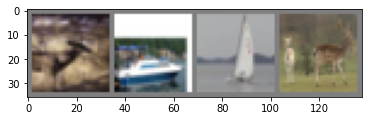

In [35]:
import matplotlib.pyplot as plt
import numpy as np

classes = ("plane", "car", "bird", "cat", "deer",
           "dog", "frog", "horse", "ship", "truck")


def imshow(img):
    img = img / 2 + 0.5  # unnormalise
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))


# Get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# Show images
imshow(torchvision.utils.make_grid(images))
# Print labels
print(" ".join("%5s" % classes[labels[j]] for j in range(4)))


## Training Your PyTorch Model

In [36]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

import torchvision
import torchvision.transforms as transforms

import matplotlib
import matplotlib.pyplot as plt
import numpy as np

In [37]:
testset = torchvision.datasets.CIFAR10(
    root="./data", train=False, download=True, transform=transform
)
testloader = torch.utils.data.DataLoader(
    testset, batch_size=4, shuffle=False, num_workers=2
)


Files already downloaded and verified


In [39]:
# The model we'll train - a variant of LeNet adapted for 3-colour images

class Net(nn.Module):
    def __init__(self):
        """Define the neural network architecure, instantiate layers."""
        super(Net, self).__init__()  # call __init__() of nn.Module superclass

        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)

        self.fc1 = nn.Linear(16*5*5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        """Computes the output of the network for an input x."""
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))

        x = x.view(-1, 16*5*5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)

        return x

net = Net()

In [41]:
# Loss function and optimiser

criterion = nn.CrossEntropyLoss()
optimiser = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [42]:
for epoch in range(2):

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # Get inputs
        inputs, labels = data

        # Zero parameter gradients
        optimiser.zero_grad()

        # Forward pass, backward pass, optimise
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()   # calc gradients that will direct learning
        optimiser.step()  # optimiser performs one learning step

        # Print stats
        running_loss += loss.item()
        if i % 2000 == 1999:
            print("[%d, %5d] loss: %.3f" % (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print("Finished training.")

[1,  2000] loss: 2.203
[1,  4000] loss: 1.847
[1,  6000] loss: 1.644
[1,  8000] loss: 1.552
[1, 10000] loss: 1.510
[1, 12000] loss: 1.455
[2,  2000] loss: 1.396
[2,  4000] loss: 1.377
[2,  6000] loss: 1.360
[2,  8000] loss: 1.306
[2, 10000] loss: 1.307
[2, 12000] loss: 1.284
Finished training.


In [58]:
correct = 0
total = 0

with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f"Network accuracy on the 10,000 test immages: {100*correct/total}%")

Network accuracy on the 10,000 test immages: 52.73%
